In [1]:
# Import required python modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pxo
import plotly.express as px
%matplotlib inline

# Read CSV file using Pandas Library

df = pd.read_csv('./fruitvegprices-2017_2022.csv')

# To view top 20 rows for initial analysis

df.head(20)


,category,item,variety,date,price,unit
0,fruit,apples,bramleys_seedling,2022-03-11,2.05,kg
1,fruit,apples,coxs_orange_group,2022-03-11,1.22,kg
2,fruit,apples,egremont_russet,2022-03-11,1.14,kg
3,fruit,apples,braeburn,2022-03-11,1.05,kg
4,fruit,apples,gala,2022-03-11,1.03,kg
5,fruit,apples,other_late_season,2022-03-11,0.85,kg
6,fruit,pears,conference,2022-03-11,0.77,kg
7,fruit,pears,doyenne_du_comice,2022-03-11,1.24,kg
8,vegetable,beetroot,beetroot,2022-03-11,0.52,kg
9,vegetable,brussels_sprouts,brussels_sprouts,2022-03-11,0.78,kg


In [2]:
#To retrieve information about the dataframe object
#useful to understand columns data types
#and quickly inspect if there are nullable values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9647 entries, 0 to 9646
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  9647 non-null   object 
 1   item      9647 non-null   object 
 2   variety   9647 non-null   object 
 3   date      9647 non-null   object 
 4   price     9647 non-null   float64
 5   unit      9647 non-null   object 
dtypes: float64(1), object(5)
memory usage: 452.3+ KB


The type of date attribute is in object which is not ideal to use especially when one has to manipulate data around time series. Hence coverting it to datetime type.

In [3]:
# Converting data field from object to datetime
df['date'] = pd.to_datetime(df['date'])

In order to extract subset of data, we can utilise below filtering by applying query method

In [4]:
df.query('date=="2017-11-03" & item=="apples"')

,category,item,variety,date,price,unit
9593,fruit,apples,bramleys_seedling,2017-11-03,0.73,kg
9594,fruit,apples,coxs_orange_group,2017-11-03,0.75,kg
9595,fruit,apples,egremont_russet,2017-11-03,0.82,kg
9596,fruit,apples,braeburn,2017-11-03,0.64,kg
9597,fruit,apples,gala,2017-11-03,0.79,kg
9598,fruit,apples,other_mid_season,2017-11-03,0.76,kg
9599,fruit,apples,other_late_season,2017-11-03,0.75,kg


vegetable      7264
fruit          1992
cut_flowers     342
pot_plants       49
Name: category, dtype: int64


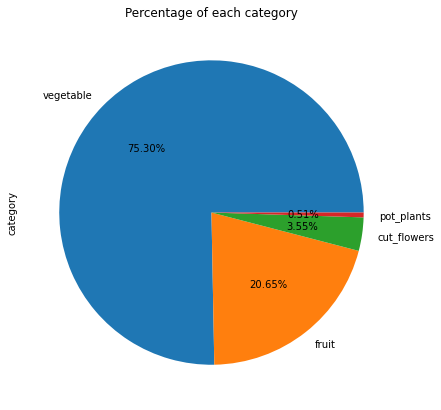

In [5]:
# To retrieve counts of unique values by cateogry field

unique_category_count = df['category'].value_counts()
print(unique_category_count)

#create pie chart
plt.figure(figsize=(15,7))
unique_category_count.plot(kind='pie', autopct='%.2f%%', title='Percentage of each category')
plt.show()

The chart illustrates UK fresh produce market comprises 76% of vegetables as compared to other categories

In [9]:
# Applying GroupBy method on item and variety and read unique count value
# price_per_variety = df.groupby(['category','item'])['variety'].unique()
# price_per_variety = price_per_variety_over_time.reset_index(name='Total')
# print(price_per_variety)
fig = px.sunburst(df, path = ['category','item','variety'], width=800, height=800, title='Categorical Heirarchy')
fig.show()

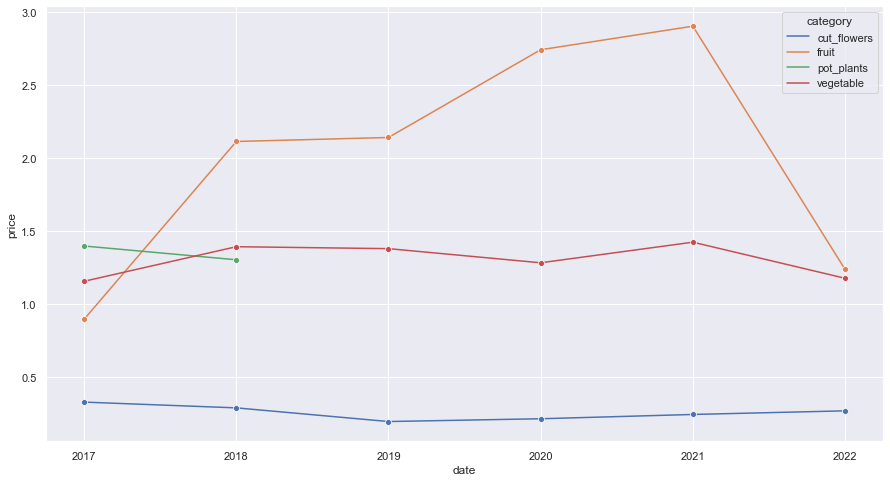

In [12]:
# Define Plot Size

fig, axs = plt.subplots(figsize=(15,8))

# Calculate yearly average price for each category

avg_price = df.groupby([df["date"].dt.year, "category"])["price"].mean().reset_index()


# Using Seaborn library to plot line chart

sns.set_theme(style="darkgrid")
sns.lineplot(data = avg_price, x="date", y="price", hue="category", marker="o")
plt.show()

To summarise, fruits and vegetables are the highest contributors in the wholesale fresh produce market. It is also important to note that price of Fruit category have fallen significantly in 2022 though Vegetable and Cut flowers didn't follow exactly the same trend. Pot plants didn't really have attractive market and selling of these goods have stopped in 2018.